In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
from actions_classificator import ds

trainset, testset = torch.utils.data.random_split(ds, [0.8, 0.2])

trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset,
                                          shuffle=True, num_workers=2)

len(trainset), len(testset)

(26, 6)

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [4]:
from actions_classificator import get_model
model = get_model().to(device)
model

ActionsClassificator(
  (fc_01): Linear(in_features=32, out_features=64, bias=True)
  (fc_02): Linear(in_features=64, out_features=128, bias=True)
  (fc_03): Linear(in_features=128, out_features=64, bias=True)
  (fc_04): Linear(in_features=64, out_features=32, bias=True)
  (fc_05): Linear(in_features=32, out_features=16, bias=True)
  (fc_06): Linear(in_features=16, out_features=3, bias=True)
  (activation): ReLU()
  (out_layer): Softmax(dim=-1)
)

In [14]:
train_losses = list()
best_model = None

EPOCHS = 100
lr = 0.00001
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

In [15]:
from tqdm import tqdm
from copy import deepcopy

In [16]:
def train_step(model, loader, loss_fn, optimizer, device) -> float:
  train_loss = 0
  for X, Y in tqdm(loader):
    y_pred = model(X.to(device))
    loss = loss_fn(y_pred, Y.to(device))
    loss.backward(retain_graph=True)
    optimizer.step()
    train_loss += loss.item()
  return train_loss / len(loader)

In [17]:
def train_model():
  global best_model
  for epoch in range(EPOCHS):
    print("epoch: [{}/{}]".format(epoch+1, EPOCHS))
    train_losses.append(train_step(model, trainloader, loss_fn, optimizer, device))
    print("\tLoss: {}".format(train_losses[-1]))
    if train_losses[-1] == min(train_losses):
      best_model = deepcopy(model)

In [25]:
train_model()

epoch: [1/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5523556998142829
epoch: [2/100]


100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


	Loss: 0.5522637023375585
epoch: [3/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.5521423702056591
epoch: [4/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5521090053595029
epoch: [5/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.552046768940412
epoch: [6/100]


100%|██████████| 26/26 [00:04<00:00,  5.89it/s]


	Loss: 0.5520336811359112
epoch: [7/100]


100%|██████████| 26/26 [00:04<00:00,  5.91it/s]


	Loss: 0.5520254809122819
epoch: [8/100]


100%|██████████| 26/26 [00:04<00:00,  5.93it/s]


	Loss: 0.5520776693637555
epoch: [9/100]


100%|██████████| 26/26 [00:04<00:00,  5.84it/s]


	Loss: 0.5521103350015787
epoch: [10/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5521995493998895
epoch: [11/100]


100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


	Loss: 0.5522530193512256
epoch: [12/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5523124910317935
epoch: [13/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5523188664362981
epoch: [14/100]


100%|██████████| 26/26 [00:04<00:00,  5.94it/s]


	Loss: 0.5522934656876785
epoch: [15/100]


100%|██████████| 26/26 [00:04<00:00,  5.92it/s]


	Loss: 0.5521825964634235
epoch: [16/100]


100%|██████████| 26/26 [00:04<00:00,  5.91it/s]


	Loss: 0.5521478079832517
epoch: [17/100]


100%|██████████| 26/26 [00:04<00:00,  5.84it/s]


	Loss: 0.5520422481573545
epoch: [18/100]


100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


	Loss: 0.5519450994638296
epoch: [19/100]


100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


	Loss: 0.5518935368611262
epoch: [20/100]


100%|██████████| 26/26 [00:04<00:00,  5.89it/s]


	Loss: 0.5518860312608572
epoch: [21/100]


100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


	Loss: 0.5518763615534856
epoch: [22/100]


100%|██████████| 26/26 [00:04<00:00,  5.85it/s]


	Loss: 0.5518931906956893
epoch: [23/100]


100%|██████████| 26/26 [00:04<00:00,  5.97it/s]


	Loss: 0.5519393728329585
epoch: [24/100]


100%|██████████| 26/26 [00:04<00:00,  5.89it/s]


	Loss: 0.5519829392433167
epoch: [25/100]


100%|██████████| 26/26 [00:04<00:00,  5.93it/s]


	Loss: 0.5520648887524238
epoch: [26/100]


100%|██████████| 26/26 [00:04<00:00,  5.86it/s]


	Loss: 0.5521125449584081
epoch: [27/100]


100%|██████████| 26/26 [00:04<00:00,  5.86it/s]


	Loss: 0.5521874886292678
epoch: [28/100]


100%|██████████| 26/26 [00:04<00:00,  5.85it/s]


	Loss: 0.5521607995033264
epoch: [29/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.5521257084149581
epoch: [30/100]


100%|██████████| 26/26 [00:04<00:00,  5.73it/s]


	Loss: 0.5519592418120458
epoch: [31/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5519054348652179
epoch: [32/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5518097946277032
epoch: [33/100]


100%|██████████| 26/26 [00:04<00:00,  5.72it/s]


	Loss: 0.5517703799101022
epoch: [34/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5517308299358075
epoch: [35/100]


100%|██████████| 26/26 [00:04<00:00,  5.73it/s]


	Loss: 0.5517283861453717
epoch: [36/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.551723681963407
epoch: [37/100]


100%|██████████| 26/26 [00:04<00:00,  5.73it/s]


	Loss: 0.5517538373286908
epoch: [38/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5517799854278564
epoch: [39/100]


100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


	Loss: 0.5518119358099424
epoch: [40/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5518972071317526
epoch: [41/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.5520326288846823
epoch: [42/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5520784419316512
epoch: [43/100]


100%|██████████| 26/26 [00:04<00:00,  5.71it/s]


	Loss: 0.5520799480951749
epoch: [44/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5520631120755122
epoch: [45/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5519432975695684
epoch: [46/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5518492918748122
epoch: [47/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5518013995427352
epoch: [48/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5517103511553544
epoch: [49/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5517101127367753
epoch: [50/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5517013623164251
epoch: [51/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5516984531512628
epoch: [52/100]


100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


	Loss: 0.5517201400720156
epoch: [53/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5517310591844412
epoch: [54/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5517772252743061
epoch: [55/100]


100%|██████████| 26/26 [00:04<00:00,  5.84it/s]


	Loss: 0.5518170182521527
epoch: [56/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.5518413552871118
epoch: [57/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5518900316495162
epoch: [58/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5519504638818594
epoch: [59/100]


100%|██████████| 26/26 [00:04<00:00,  5.72it/s]


	Loss: 0.5519870405013745
epoch: [60/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5519891931460454
epoch: [61/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5519691934952369
epoch: [62/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5519430660284482
epoch: [63/100]


100%|██████████| 26/26 [00:04<00:00,  5.72it/s]


	Loss: 0.5518652040224808
epoch: [64/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.551778678710644
epoch: [65/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5517389728472784
epoch: [66/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5517136248258444
epoch: [67/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5516863098511329
epoch: [68/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.551667889723411
epoch: [69/100]


100%|██████████| 26/26 [00:04<00:00,  5.69it/s]


	Loss: 0.5516543021568885
epoch: [70/100]


100%|██████████| 26/26 [00:04<00:00,  5.77it/s]


	Loss: 0.5516345271697412
epoch: [71/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5516280142160562
epoch: [72/100]


100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


	Loss: 0.5516128310790429
epoch: [73/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5516229340663323
epoch: [74/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.551619651225897
epoch: [75/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5516165907566364
epoch: [76/100]


100%|██████████| 26/26 [00:04<00:00,  5.79it/s]


	Loss: 0.5516443160864023
epoch: [77/100]


100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


	Loss: 0.5516527730685014
epoch: [78/100]


100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


	Loss: 0.5516652854589316
epoch: [79/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5516708905880268
epoch: [80/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5516647513096149
epoch: [81/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5516343919130472
epoch: [82/100]


100%|██████████| 26/26 [00:04<00:00,  5.74it/s]


	Loss: 0.5516083309283624
epoch: [83/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5515795418849359
epoch: [84/100]


100%|██████████| 26/26 [00:04<00:00,  5.70it/s]


	Loss: 0.5515521695980659
epoch: [85/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5515438707975241
epoch: [86/100]


100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


	Loss: 0.5515205034842858
epoch: [87/100]


100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


	Loss: 0.5515125508491809
epoch: [88/100]


100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


	Loss: 0.5515060378954961
epoch: [89/100]


100%|██████████| 26/26 [00:04<00:00,  5.84it/s]


	Loss: 0.5515006161653079
epoch: [90/100]


100%|██████████| 26/26 [00:04<00:00,  5.81it/s]


	Loss: 0.5514992911082047
epoch: [91/100]


100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


	Loss: 0.5514993254954998
epoch: [92/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5514986423345712
epoch: [93/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5514985391726861
epoch: [94/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5515002883397616
epoch: [95/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5515013864407172
epoch: [96/100]


100%|██████████| 26/26 [00:04<00:00,  5.76it/s]


	Loss: 0.5515038577409891
epoch: [97/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]


	Loss: 0.5515057192398951
epoch: [98/100]


100%|██████████| 26/26 [00:04<00:00,  5.70it/s]


	Loss: 0.551508231804921
epoch: [99/100]


100%|██████████| 26/26 [00:04<00:00,  5.75it/s]


	Loss: 0.5515130666586069
epoch: [100/100]


100%|██████████| 26/26 [00:04<00:00,  5.78it/s]

	Loss: 0.5515143664983603


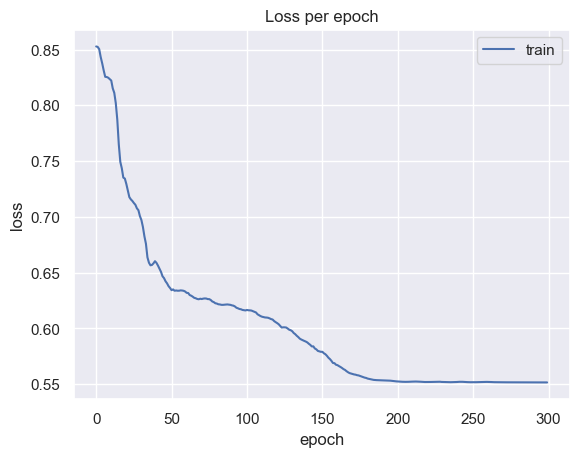

In [26]:
def plot_loss(loss_train):
  plt.plot(loss_train, label='train')
  plt.title('Loss per epoch')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend()
  plt.show()

plot_loss(train_losses)

In [27]:
for X, Y in testloader:
    print(best_model(X.to(device)).cpu().detach().numpy(), Y)

[[2.2095625e-35 1.6097682e-10 1.0000000e+00]] tensor([[0., 0., 1.]])
[[0. 1. 0.]] tensor([[0., 1., 0.]])
[[4.0520638e-21 4.9976157e-03 9.9500233e-01]] tensor([[1., 0., 0.]])
[[3.1291702e-07 9.9999964e-01 1.0736240e-13]] tensor([[0., 0., 1.]])
[[1.9882327e-08 1.0000000e+00 2.5249687e-09]] tensor([[0., 0., 1.]])
[[2.5000566e-41 1.0000000e+00 5.9249864e-38]] tensor([[1., 0., 0.]])


In [28]:
must_save = True

if must_save:
    torch.save(model.state_dict(), r"actions_classificator\weights\weights.pth")